In [1]:
import os
import binascii
from PIL import Image
from IPython.display import display

In [2]:
file = os.path.join(os.getcwd(), 'noname')

In [3]:
def map_to_exe(file):
    if not os.path.exists(file):
        return
    
    img = Image.open(file, 'r')
    print('map — noname png')
    display(img)
    pixels = img.load()
    
    data = img.info['comment']
    print('png comment: {}...'.format(data[:12]))
    coords = [(int(data[i:i+3]), int(data[i+3:i+6])) for i in range(0, len(data), 6)]
    print('coordinates of pixels with yellow shade: {}...'.format(coords[:4]))
    
    hex_data = ''
    for x, y in coords:
        dc = pixels[x, y][2]
        hx = hex(dc)[2:]
        if len(hx) < 2:
            hx = '0' + hx
        hex_data += hx
    bin_data = binascii.unhexlify(hex_data.encode())
    print('hex data: {}...'.format(hex_data[:15]))
    print('bin data: {}...'.format(bin_data[:15]))
    
    pe = os.path.join(os.getcwd(), os.path.splitext(file)[0] + '.exe')
    with open(pe, 'wb') as f:
        f.write(bin_data)
        print('saved to', pe)

map — noname png


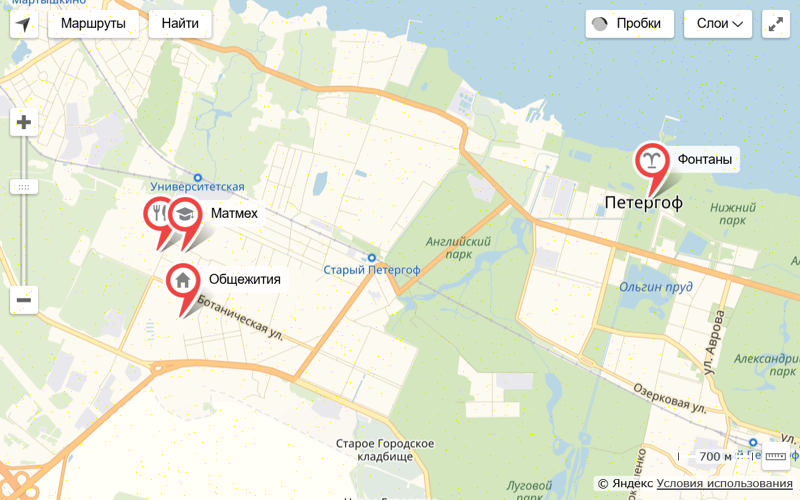

png comment: 336207159431...
coordinates of pixels with yellow shade: [(336, 207), (159, 431), (780, 65), (633, 353)]...
hex data: 4d5a90000300000...
bin data: b'MZ\x90\x00\x03\x00\x00\x00\x04\x00\x00\x00\xff\xff\x00'...
saved to C:\Users\skoret\reversecup2019\2.map\noname.exe


In [5]:
map_to_exe(file)